![](http://media.moddb.com/images/articles/1/205/204391/game_of_thrones_logo_icons.jpg)


# Exploratory Analysis of the Battles of the War of Five Kings Dataset

- Author: Chris Albon (@ChrisAlbon)
- Date: August 17, 2014
- Repo: https://github.com/chrisalbon/war_of_the_five_kings_dataset/

## Preliminary

In [23]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib as plt
# Set Jupyter Notebook's max row display to 1000
pd.set_option('display.max_rows', 1000)

# Set Jupyter Notebook's max column width to 50
pd.set_option('display.max_columns', 50)


## Loading the data

In [3]:
# Load the dataset
df = pd.read_csv('../GoT_warmup/5kings_battles_v1.csv')

## Quick check on the data

In [39]:
df.shape

(38, 25)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [50]:
df.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [35]:
columns = df.columns

In [49]:
df[columns].isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

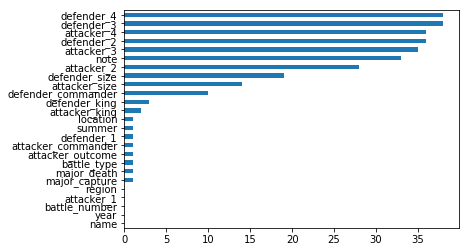

In [66]:
df[columns].isnull().sum().sort_values().plot(kind='barh')

In [4]:
# View the top five observations
df.head(5)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [25]:
# View the bottom five observations
df.tail(5)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,siege,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,siege,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
35,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,NaN,NaN,NaN,win,siege,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,NaN,NaN,NaN,win,siege,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,Frey,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


## Map of Westeros
![](http://www.slate.com/content/dam/slate/articles/news_and_politics/the_slate_quiz/authorPortraits/Game_of_Thrones_Westeros_Google_Maps.jpg)

## Exploratory Data Analysis

### Which year had the most battles?

In [65]:
%matplotlib inline

<IPython.core.display.Javascript object>


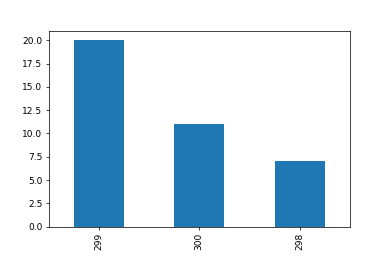

In [64]:
# Count the number of observations for each value, then make a bar plot
df['year'].value_counts().plot(kind='bar')

### Which region had the most battles?

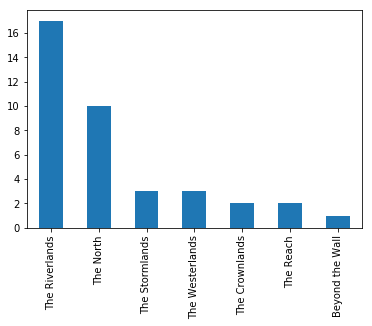

In [24]:
# Count the number of observations for each value, then make a bar plot
df['region'].value_counts().plot(kind='bar')

### What was the outcomes of all battles?

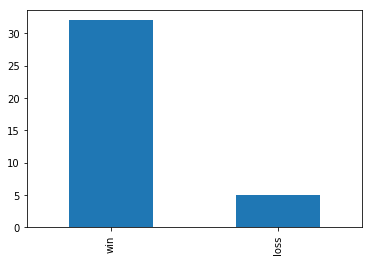

In [28]:
# Count the number of observations for each value, then make a bar plot
df['attacker_outcome'].value_counts().plot(kind='bar')

### How common was the different types of battles?

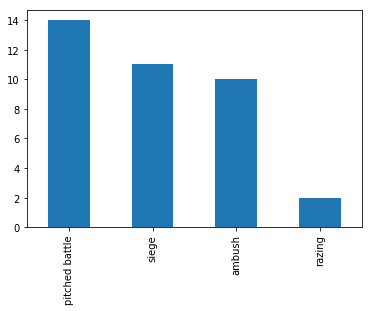

In [29]:
# Count the number of observations for each value, then make a bar plot
df['battle_type'].value_counts().plot(kind='bar')

### Which king attacked the most?

In [40]:
df

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


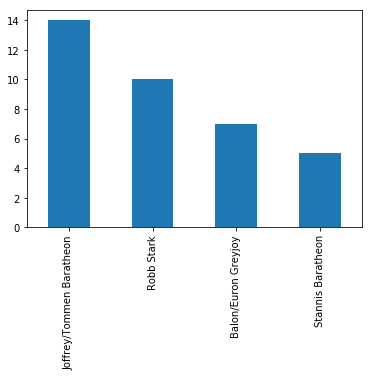

In [42]:
# Count the number of observations a king attacked another for each king, then make a bar plot
df['attacker_king'].value_counts().plot(kind='bar')

### Which king was the most attacked?

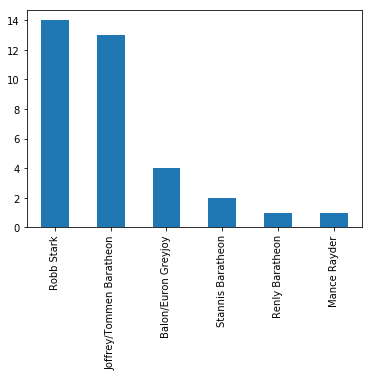

In [43]:
# Count the number of times a king was attacked for each king, then make a bar plot
df['defender_king'].value_counts().plot(kind='bar')

### Which kings were most active in the war?

In [56]:
# Count the number of battles in which a king was active for each king, then make a bar plot
active = df['defender_king'].value_counts() + df['attacker_king'].value_counts()

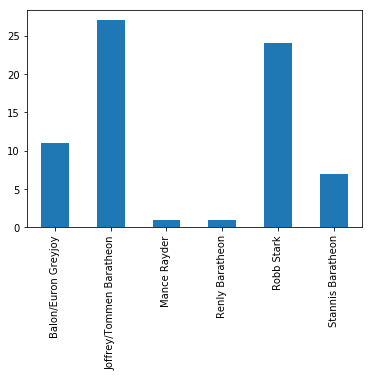

In [69]:
active.fillna(1).plot(kind='bar')

### Is there any relationship between troop size and battle outcome?

In [85]:
from sklearn.preprocessing import LabelEncoder

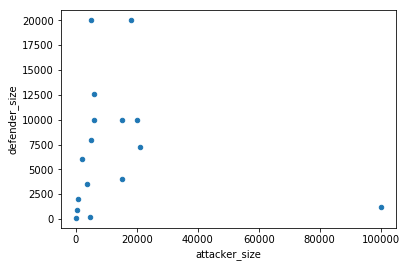

In [74]:
# Create a ggplot scatter plot of attacker_size against defender_size (if not NaN), 
df.plot.scatter('attacker_size','defender_size', s=None, c=None)